In [1]:
import pandas as pd

# Path to the CSV file
import matplotlib.pyplot as plt

csv_file = 'RetoIA\datasetIA.csv'

# Read the CSV file using pandas
data = pd.read_csv(csv_file,sep=';')
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# Define a function to show a graph of a column
def show_graph(column_name):
    # Plot the column as a graph
    data[column_name].plot()
    # Display the graph
    plt.show()

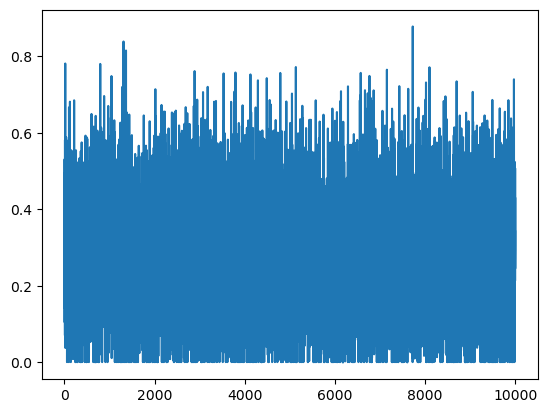

float64
Index(['Trial values', 'Aciertos', 'Fallos', 'Recompensa minima',
       'Recompensa maxima', 'Puntuación maxima', 'Tiempo de respuesta min',
       'Tiempo de respuesta maximo', 'Tiempo total de la prueba',
       'Distancia al jugador de los objetos.', 'Numero de piezas',
       'Ratio de aparición de los objetos en el juego.',
       'Ratio de recompensa de los objetos.', 'Tamaño de los objetos.'],
      dtype='object')
0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
9994    9995.0
9995    9996.0
9996    9997.0
9997    9998.0
9998    9999.0
Name: Trial values, Length: 9999, dtype: float64


In [2]:
columnas = ["Trial values", "Aciertos", "Fallos", "Recompensa minima", "Recompensa maxima", "Puntuación maxima", "Tiempo de respuesta min", "Tiempo de respuesta maximo", "Tiempo total de la prueba", "Distancia al jugador de los objetos", "Numero de piezas", "Ratio de aparición de los objetos en el juego", "Ratio de recompensa de los objetos", "Tamaño de los objetos"]

# Call the function to show a graph of a specific column
show_graph(columnas[4])
print(data['Aciertos'].dtypes)
# Display the data
print(data.columns)
print(data['Trial values'])